In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv("tableau_ready_sentiment_data.csv")

features = [
    "roberta_pos_score",
    "roberta_neg_score",
    "roberta_neu_score",
    "sentiment_polarity",
    "engagement_score"
]

target = "pct_change"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]


In [6]:
# --- 3. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# --- 4. Train both models ---

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [8]:
# --- 5. Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"  MAE:  {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"  MSE:  {mean_squared_error(y_true, y_pred):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")


In [9]:
# --- 6. Evaluate Both Models ---
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Random Forest Evaluation:
  MAE:  2.4367
  MSE:  9.5523
  RMSE: 3.0907
  R²:   -0.0858

XGBoost Evaluation:
  MAE:  2.3957
  MSE:  9.2622
  RMSE: 3.0434
  R²:   -0.0528


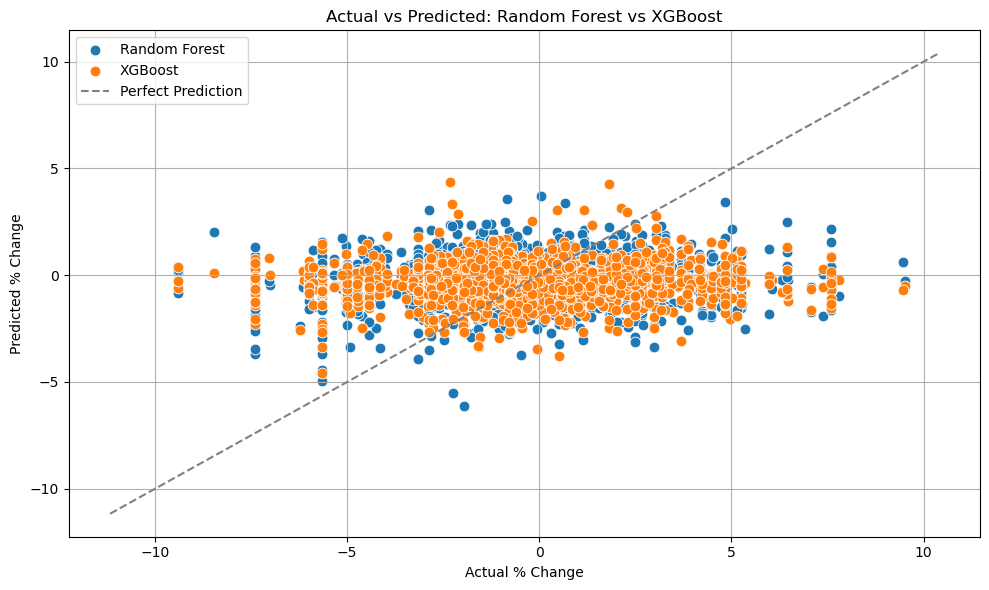

In [10]:
# --- 7. Plot Actual vs Predicted ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_preds, label='Random Forest', s=60)
sns.scatterplot(x=y_test, y=xgb_preds, label='XGBoost', s=60)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray', label='Perfect Prediction')
plt.xlabel("Actual % Change")
plt.ylabel("Predicted % Change")
plt.title("Actual vs Predicted: Random Forest vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import joblib
joblib.dump(xgb_model, "model.pkl")  # or rf_model if it performed better
print("✅ model.pkl saved!")


✅ model.pkl saved!
